# Importing packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Understanding the data

In [54]:
data = pd.read_csv("PCOS_data.csv")
df = data.copy()
print(df.shape)
df.head()

(541, 45)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [56]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


# Handling duplicates and NA values

In [57]:
df.duplicated().sum()

0

In [58]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

# Handling columns with wrong types

In [59]:
# find which columns do not contain numeric values (should be all numeric)
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Unnamed: 44']


In [60]:
non_numeric_values = df[pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce').isna() & df['II    beta-HCG(mIU/mL)'].notna()]['II    beta-HCG(mIU/mL)']

print("Non-numeric values in column:", non_numeric_values.tolist())

Non-numeric values in column: ['1.99.']


In [61]:
non_numeric_values = df[pd.to_numeric(df['AMH(ng/mL)'], errors='coerce').isna() & df['AMH(ng/mL)'].notna()]['AMH(ng/mL)']

print("Non-numeric values in column:", non_numeric_values.tolist())

Non-numeric values in column: ['a']


In [62]:
# change the values to numeric
#1.99. high likely is a typo (extra .), so we remove the '.'
df.loc[df['II    beta-HCG(mIU/mL)'] == '1.99.', 'II    beta-HCG(mIU/mL)'] = 1.99

# 'a' does not make sense here, so we change it to NaN
df.loc[df['AMH(ng/mL)'] == 'a', 'AMH(ng/mL)'] = np.nan

In [63]:
non_numeric_cols = df.select_dtypes(exclude=['number'])

# Check for non-numeric values
for col in non_numeric_cols.columns:
    non_numeric_rows = non_numeric_cols[non_numeric_cols[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
    if not non_numeric_rows.empty:
        print(f"Column '{col}' contains non-numeric values:\n{non_numeric_rows}\n")

Column 'AMH(ng/mL)' contains non-numeric values:
    II    beta-HCG(mIU/mL) AMH(ng/mL) Unnamed: 44
305                   1.99        NaN         NaN

Column 'Unnamed: 44' contains non-numeric values:
    II    beta-HCG(mIU/mL) AMH(ng/mL) Unnamed: 44
0                     1.99       2.07         NaN
1                     1.99       1.53         NaN
2                   494.08       6.63         NaN
3                     1.99       1.22         NaN
4                   801.45       2.26         NaN
..                     ...        ...         ...
536                   1.99        1.7         NaN
537                   1.99        5.6         NaN
538                   1.99        3.7         NaN
539                   1.99        5.2         NaN
540                   1.99         20         NaN

[540 rows x 3 columns]



In [64]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df.select_dtypes(exclude=[np.number]).columns)

Index([], dtype='object')


# Handling inconsistencies

In [65]:
df["Menstrual Cycle(R/I)"].value_counts()

KeyError: 'Menstrual Cycle(R/I)'

In [ ]:
# Removes '5' from the "Menstrual Cycle (R/I)" column
df = df[df["Menstrual Cycle(R/I)"]!=5]

Menstrual Cycle(R/I)
2    388
4    150
Name: count, dtype: int64

# Removing non-useful and highly correlated columns

In [ ]:
#S1. No and Patient File No. are both just numbering the patients, hence will not provide any useful information

df.drop(columns = ['Sl. No','Patient File No.','Unnamed: 44'],axis=1,inplace=True)

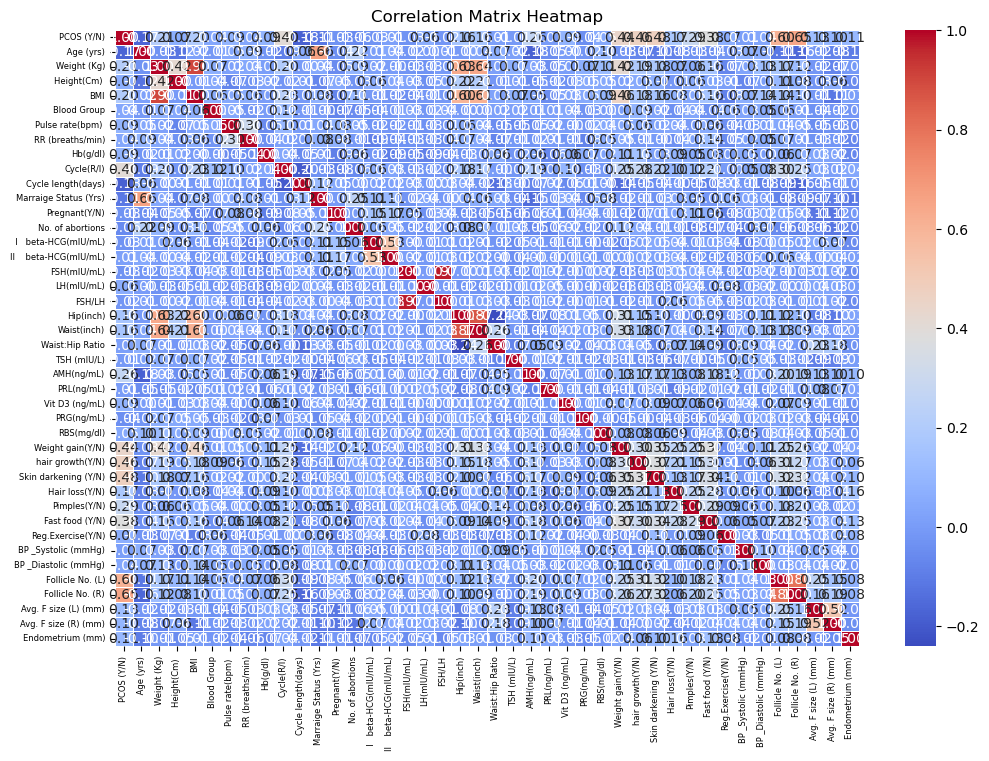

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adjust axis label font size
plt.xticks(fontsize=6, rotation=90)  # X-axis label size
plt.yticks(fontsize=6)  # Y-axis label size
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#BMI is derived from height and weight, hence will be highly correlated
#Waist:Hip Ratio is derived from hip and waist, hence will be highly correlated
#Marriage Status correlated with Age

#Hip and Waist correlated with BMI/weight as well
#I   beta-HCG(mIU/mL) and II   beta-HCG(mIU/mL) correlated, can check the meaning of both terms
#FSH/LH and FSH(mIU/mL) highly correlated, may be same thing
#weight gain and weight/bmi correlated
#Follicle No. (L) and (R) highly correlated
#Avg. F size (L) and (R) correlated

df.drop(columns = ['Weight (Kg)','Height(Cm) ','Hip(inch)', 'Waist(inch)'],axis=1,inplace=True)

In [ ]:
print(df.columns)

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


# Renaming columns

In [ ]:
# Remove space in column names using strip() function
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)',
       'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [ ]:
# Correct spelling errors and make the column names clearer
d={"Marraige Status (Yrs)":"Marriage Status (Yrs)", "Cycle(R/I)":"Menstrual Cycle(R/I)", 
   "Cycle length(days)": "Menstrual Cycle Length(days)"}
df.rename(columns=d, inplace=True)
print(df.columns)

Index(['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Menstrual Cycle(R/I)',
       'Menstrual Cycle Length(days)', 'Marriage Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


# Handling NA values

In [ ]:
df.isna().sum()

PCOS (Y/N)                      0
Age (yrs)                       0
BMI                             0
Blood Group                     0
Pulse rate(bpm)                 0
RR (breaths/min)                0
Hb(g/dl)                        0
Menstrual Cycle(R/I)            0
Menstrual Cycle Length(days)    0
Marriage Status (Yrs)           1
Pregnant(Y/N)                   0
No. of abortions                0
I   beta-HCG(mIU/mL)            0
II    beta-HCG(mIU/mL)          0
FSH(mIU/mL)                     0
LH(mIU/mL)                      0
FSH/LH                          0
Waist:Hip Ratio                 0
TSH (mIU/L)                     0
AMH(ng/mL)                      1
PRL(ng/mL)                      0
Vit D3 (ng/mL)                  0
PRG(ng/mL)                      0
RBS(mg/dl)                      0
Weight gain(Y/N)                0
hair growth(Y/N)                0
Skin darkening (Y/N)            0
Hair loss(Y/N)                  0
Pimples(Y/N)                    0
Fast food (Y/N

In [ ]:
df.dropna(axis=1, inplace=True)
print(df.isna().sum().sum())

0


# Handling outliers

In [ ]:
# Pulse rate(bpm)
df[(df["Pulse rate(bpm)"]<60)|(df["Pulse rate(bpm)"]>100)]

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle(R/I),Menstrual Cycle Length(days),Pregnant(Y/N),...,Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
223,0,30,21.7,11,18,20,12.0,2,5,0,...,1,0,1,120,70,4,3,14.0,18.0,8.7
296,0,31,20.8,15,13,18,11.0,2,4,0,...,0,1,0,110,70,8,5,17.0,15.0,8.5


In [ ]:
# Removed those patients who have super low pulse rates
df = df[(df["Pulse rate(bpm)"]>=60) & (df["Pulse rate(bpm)"]<=100)]

# Changing the integers in categorical columns to strings, before one-hot encoding

In [ ]:
# Blood Group
d={11: "A+", 12: "A-", 13: "B+", 14: "B-", 15: "O+", 16:"O-", 17: "AB+", 18: "AB-"}
df["Blood Group"] = df["Blood Group"].replace(to_replace=d)
df["Blood Group"].value_counts()

Blood Group
O+     205
B+     134
A+     107
AB+     42
O-      19
B-      16
A-      13
AB-      2
Name: count, dtype: int64

In [ ]:
# Menstrual Cycle(R/I)
d={4: "irregular", 2: "regular"}
df["Menstrual Cycle(R/I)"] = df["Menstrual Cycle(R/I)"].replace(to_replace=d)
df["Menstrual Cycle(R/I)"].value_counts()

Menstrual Cycle(R/I)
regular      388
irregular    150
Name: count, dtype: int64

# One-Hot Encoding of categorical columns

In [ ]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['Blood Group', 'Menstrual Cycle(R/I)']


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
df= pd.concat([df.drop(cat_cols, axis=1), one_hot_df], axis=1)
df.head()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0.0,28.0,19.3,78.0,22.0,10.48,5.0,0.0,0.0,1.99,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,36.0,24.9,74.0,20.0,11.70,5.0,1.0,0.0,60.80,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,33.0,25.3,72.0,18.0,11.80,5.0,1.0,0.0,494.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,37.0,29.7,72.0,20.0,12.00,5.0,0.0,0.0,1.99,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,25.0,20.1,72.0,18.0,10.00,5.0,1.0,0.0,801.45,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Saving the csv file

In [ ]:
df.to_csv("cleaned_data.csv", header=True, index=False)

# EDA

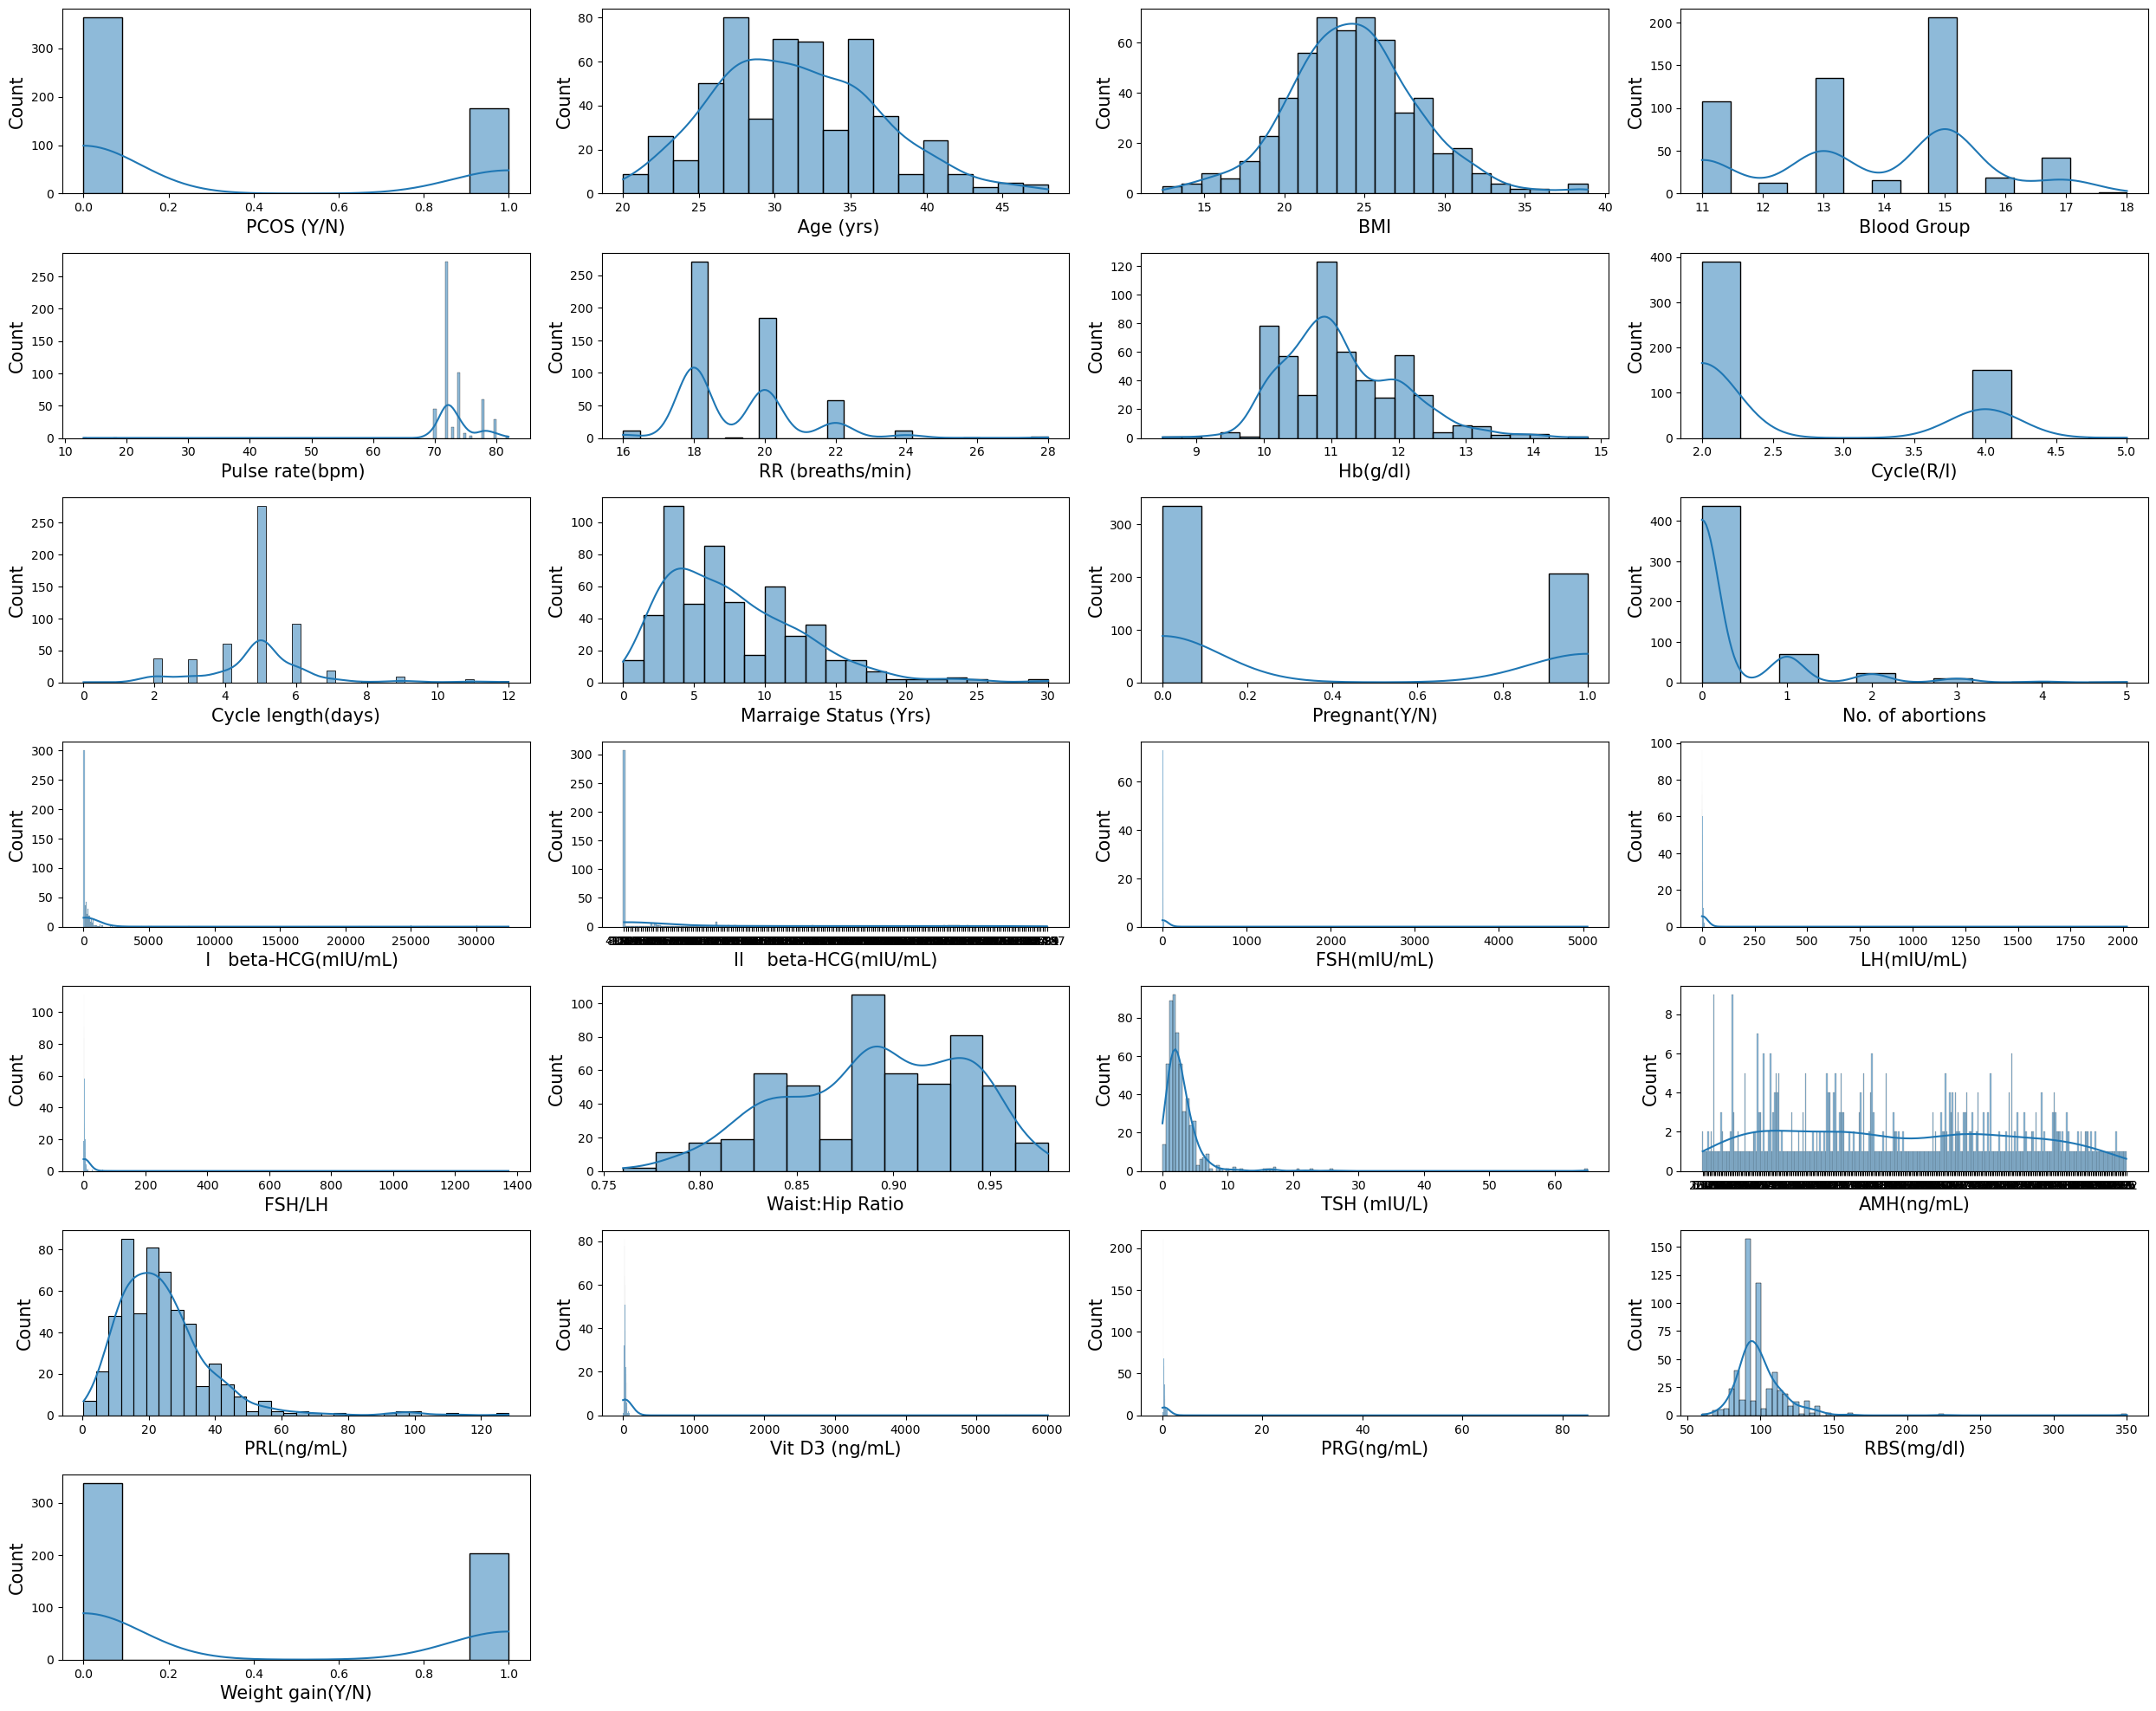

In [ ]:
plt.figure(figsize=(25, 25))
plot_num = 1
num_cols = min(len(df.columns), 25)  # Ensure we don't exceed the number of columns in df
rows = (num_cols - 1) // 3 + 1 

for col in df.columns:
    if plot_num <= num_cols:
        plt.subplot(rows, 4, plot_num)  # Adjust the subplot layout dynamically
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize=15)
        plt.ylabel('Count', fontsize=15)  # Assuming ylabel is 'Count' for all
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plot_num += 1

plt.tight_layout()
plt.show()

In [ ]:
# Standardize values

# Converting columns into categorical variables

In [ ]:
cat_df = df.copy()

In [ ]:
# Hb(g/dl)
cat_df.loc[cat_df["Hb(g/dl)"] < 12 , "Hb(g/dl)"] = -1
cat_df.loc[(cat_df["Hb(g/dl)"] >= 12) & (cat_df["Hb(g/dl)"] <= 16), "Hb(g/dl)"] = 0
cat_df.loc[cat_df["Hb(g/dl)"] > 16 , "Hb(g/dl)"] = 1

# TSH (mIU/L)
cat_df.loc[cat_df["TSH (mIU/L)"] < 0.4 , "TSH (mIU/L)"] = -1
cat_df.loc[(cat_df["TSH (mIU/L)"] >= 0.4) & (cat_df["TSH (mIU/L)"] <= 4), "TSH (mIU/L)"] = 0
cat_df.loc[cat_df["TSH (mIU/L)"] > 4 , "TSH (mIU/L)"] = 1

# AMH(ng/mL)
cat_df.loc[cat_df["AMH(ng/mL)"] < 1 , "AMH(ng/mL)"] = -1
cat_df.loc[(cat_df["AMH(ng/mL)"] >= 1) & (cat_df["AMH(ng/mL)"] <= 3), "AMH(ng/mL)"] = 0
cat_df.loc[cat_df["AMH(ng/mL)"] > 3 , "AMH(ng/mL)"] = 1

# PRL(ng/mL)
# For not pregnant women
cat_df.loc[(cat_df["PRL(ng/mL)"] < 25) & (cat_df["Pregnant(Y/N)"] == 0) , "PRL(ng/mL)"] = 0
cat_df.loc[(cat_df["PRL(ng/mL)"] >= 25) & (cat_df["Pregnant(Y/N)"] == 0) , "PRL(ng/mL)"] = 1
# For pregnant women
cat_df.loc[(cat_df["PRL(ng/mL)"] < 80) & (cat_df["Pregnant(Y/N)"] == 1) , "PRL(ng/mL)"] = -1
cat_df.loc[(cat_df["PRL(ng/mL)"] >= 80) & (cat_df["PRL(ng/mL)"] <= 400) & (cat_df["Pregnant(Y/N)"] == 1), "PRL(ng/mL)"] = 0
cat_df.loc[(cat_df["PRL(ng/mL)"] > 400) & (cat_df["Pregnant(Y/N)"] == 1) , "PRL(ng/mL)"] = 1

# Vit D3 (ng/mL)
cat_df.loc[cat_df["Vit D3 (ng/mL)"] < 20 , "Vit D3 (ng/mL)"] = -1
cat_df.loc[cat_df["Vit D3 (ng/mL)"] >= 20 , "Vit D3 (ng/mL)"] = 0

KeyError: 'AMH(ng/mL)'

In [ ]:
cat_df.loc[cat_df["RR (breaths/min)"]]

0      22.0
1      20.0
2      18.0
3      20.0
4      18.0
       ... 
539    20.0
540    20.0
223     NaN
296     NaN
512     NaN
Name: RR (breaths/min), Length: 541, dtype: float64

# One-Hot Encoding of categorical columns

In [ ]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_cols)

['Blood Group', 'Menstrual Cycle(R/I)']


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))
df= pd.concat([df.drop(cat_cols, axis=1), one_hot_df], axis=1)
df.head()

,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0.0,28.0,19.3,78.0,22.0,10.48,5.0,0.0,0.0,1.99,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,36.0,24.9,74.0,20.0,11.70,5.0,1.0,0.0,60.80,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,33.0,25.3,72.0,18.0,11.80,5.0,1.0,0.0,494.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,37.0,29.7,72.0,20.0,12.00,5.0,0.0,0.0,1.99,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,25.0,20.1,72.0,18.0,10.00,5.0,1.0,0.0,801.45,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
